# .NET Initialization
<div style="width:100%;height:6px;background-color:Black;"></div>

In [1]:
import clr
clr.AddReference(r"..\bin\MiniSim.Core")

import MiniSim.Core.Expressions as expr
import MiniSim.Core.Flowsheeting as fl
import MiniSim.Core.Numerics as num
import MiniSim.Core.UnitsOfMeasure as uom
import MiniSim.Core.ModelLibrary as lib
import MiniSim.Core.PropertyDatabase as pdb
from MiniSim.Core.Reporting import Generator, StringBuilderLogger
import MiniSim.Core.Thermodynamics as thermo

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams['grid.color'] = 'k'

# Set up Thermodynamics
<div style="width:100%;height:6px;background-color:Black;"></div>

In [5]:
Database = pdb.IKCapeAdapter()
logger = StringBuilderLogger()
reporter = Generator(logger)

with open ("btx.dat", "r") as myfile:
    content=myfile.read()
    
sys= Database.LoadNeutralFile(str(content))

In [6]:
names=sys.GetComponentIds()
longnames=sys.GetComponentNames()
cas= sys.GetComponentCASNumbers()
mw= sys.GetComponentMolarWeights()
numComps=len(sys.Components)

df_data=pd.DataFrame(zip(longnames, cas, mw), index= names, columns= ["Name","CASNo","MolarWeight"])
df_data

,Name,CASNo,MolarWeight
BENZOL,BENZENE,71-43-2,0.078115
TOLUOL,TOLUENE,108-88-3,0.092142
XYLOL,P-XYLENE,106-42-3,0.106169


# Pure Component Properties
<div style="width:100%;height:6px;background-color:Black;"></div>

In [7]:
calc= thermo.ThermodynamicCalculator(sys)

In [8]:
Tmin=0
Tmax=400
steps=41
Tvec= np.linspace(Tmin+273.15,Tmax+273.15,steps)

## Vapor Pressure

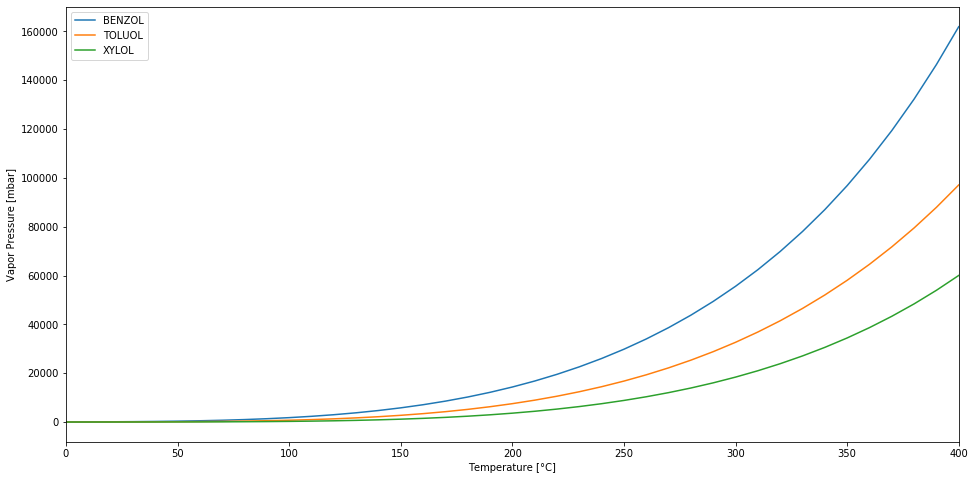

In [9]:
value_matrix={}

for c in names:
    values=[]
    for T in Tvec:
        y= calc.GetPureComponentProperty(c, "VP",T)/100
        values.append(y)
    value_matrix[c]=values


#value_matrix
df_vp= pd.DataFrame(value_matrix, index=Tvec-273.15)
df_vp.plot()
plt.xlabel("Temperature [°C]")
plt.ylabel("Vapor Pressure [mbar]");